<a href="https://colab.research.google.com/github/vibhu18116/IR-Project-Group23-PatentPal/blob/main/BigPatent_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import gzip
import os
import sys
import argparse
import pickle

%cd /content/drive/MyDrive/bigPatentData

def readData(input_path,split_type,cpc_code):
    file_names = os.listdir(os.path.join(input_path,split_type,cpc_code))
    # list to store data of all the files in a particular cpc folder
    LIST = []
    # read all files in a cpc code of given split
    # The data is like too large so not storing data of all files for now
    # so taking only 25 files from the cpc folder
    for file_name in file_names[0:25]: 
        #print("Reading file "+ file_name + " from "+ split_type+" split for cpc code " + cpc_code)
        with gzip.open(os.path.join(input_path,split_type,cpc_code,file_name),'r') as fin:
            for row in fin:
                json_obj = json.loads(row)
                LIST.append(json_obj)
    #print(LIST)
    fname = split_type+"/"+cpc_code+".txt" 
    # dump the list in a file
    with open(fname, 'wb') as f:
        pickle.dump(LIST, f)

if __name__ == "__main__":

    split_type = "train"
    cpc_code = "a"
    input_path = "."
    for split_type in ["train","test","val"]:
        for cpc_code in ["a","b","c","d","e","f","g","h","y"]:
            readData(input_path,split_type,cpc_code)

In [ ]:
# read from the files
split_type = "train"
cpc_code = "a"
fname = split_type+"/"+cpc_code+".txt"
with open(fname, 'rb') as f:
    data = pickle.load(f)

os.chdir("/content/")

In [2]:
import pickle
data = pickle.load(open("/content/drive/MyDrive/bigPatentData/data_pik", 'rb'))


In [8]:
import pandas as pd
df = pd.DataFrame(data[:2000])
df_train = pd.DataFrame(data[:100])
df_test = pd.DataFrame(data[100:120])

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


EDA: Plot for Sentence Ratio of Description and Abstract

In [ ]:
ratio_sen = []
for i in range(len(df)):
  ns1 = sent_tokenize(df['description'][i])
  ns2 = sent_tokenize(df['abstract'][i])
  ratio_sen.append(len(ns2)/len(ns1))


Text(0.5, 1.0, 'Ratio of Sentences in Abstract wrt Description')

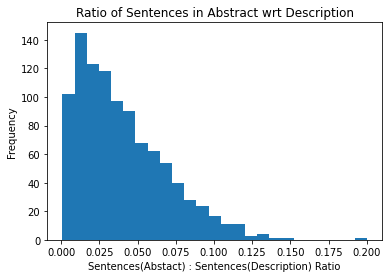

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x = ratio_sen, bins = 'auto')
plt.xlabel('Sentences(Abstact) : Sentences(Description) Ratio')
plt.ylabel('Frequency')
plt.title('Ratio of Number Sentences in Abstract w.r.t. Description')

EDA: Plot for Words Ratio of Description and Abstract

In [ ]:
from nltk.tokenize import word_tokenize

ratio_words = []
for i in range(len(df)):
  ns1 = word_tokenize(df['description'][i])
  ns2 = word_tokenize(df['abstract'][i])
  ratio_words.append(len(ns2)/len(ns1))


Text(0.5, 1.0, 'Ratio of Number of Words in Abstract w.r.t. Description')

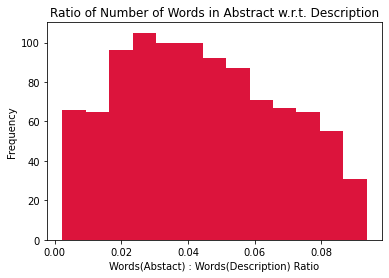

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x = ratio_words, bins = 'auto', color = "crimson")
plt.xlabel('Words(Abstact) : Words(Description) Ratio')
plt.ylabel('Frequency')
plt.title('Ratio of Number of Words in Abstract w.r.t. Description')

In [ ]:
from nltk.tokenize import word_tokenize
des_words = ""
abs_words = ""
for i in range(len(df)):
  sen1 = df['description'][i]
  sen1 = sen1.lower()
  sen2 = df['abstract'][i]
  sen2 = sen2.lower()
  ns1 = word_tokenize(sen1)
  ns2 = word_tokenize(sen2)
  des_words += " ".join(ns1)+" "
  abs_words += " ".join(ns2)+" "


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

WordCloud for Description Data

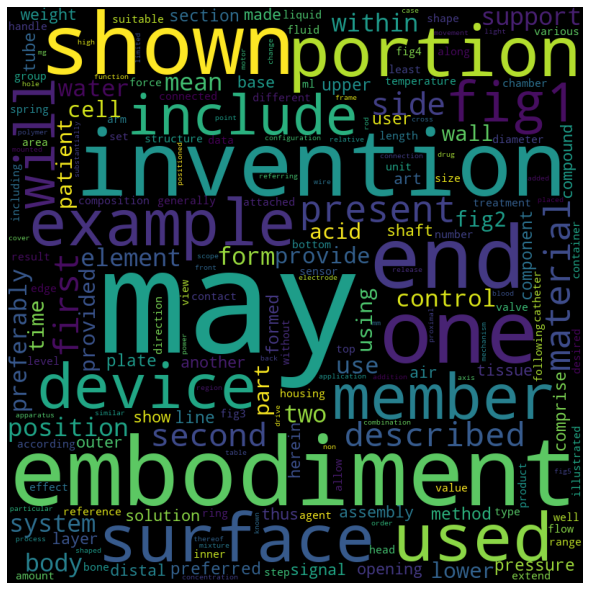

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords, collocations = False,
                min_font_size = 10).generate(des_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

WordCloud for Abstract Data

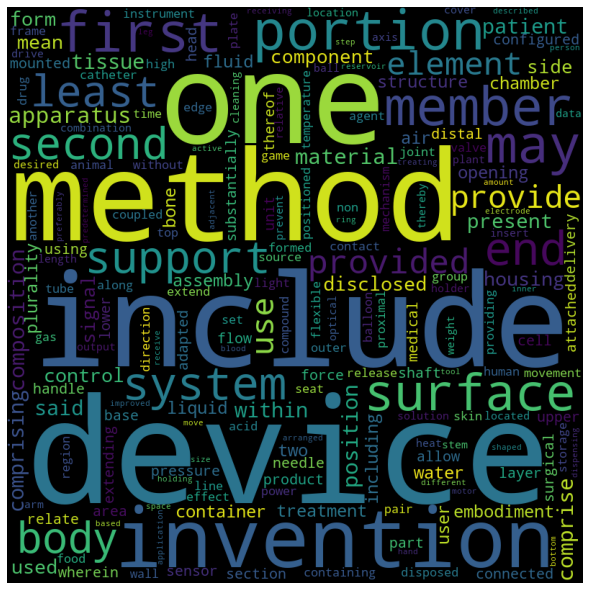

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords, collocations = False,
                min_font_size = 10).generate(abs_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Common Words in Abstract and Description

In [ ]:
from nltk.tokenize import word_tokenize
com_words = []
for i in range(len(df)):
  ns1 = word_tokenize(df['description'][i])
  ns2 = word_tokenize(df['abstract'][i])
  list1_as_set = set(ns1)
  intersection = list1_as_set.intersection(ns2)
  com_words.append(len(intersection))


Text(0.5, 1.0, 'Number of Common Words in Abstract and Description')

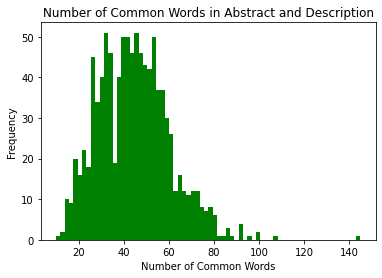

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x = com_words, bins = 70, color = "green")
plt.xlabel('Number of Common Words')
plt.ylabel('Frequency')
plt.title('Number of Common Words in Abstract and Description')

Loss Plot for LSTM

In [ ]:
f = open("epoch_loss.txt", "r")
epl = f.readlines()

In [ ]:
epl_loss = []
for i in epl:
  li = i.find("loss: ")
  val = i[li+6: li+12] 
  epl_loss.append(float(val))
  

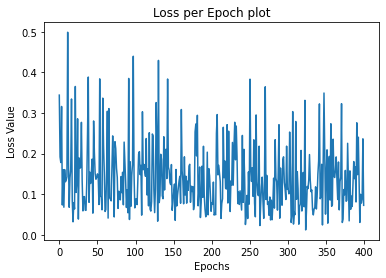

In [ ]:
plt.plot(list(range(0, 400)), epl_loss)
  
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Loss per Epoch plot')
plt.show()

Loss Plot for Bidirectional LSTM

In [ ]:
f = open("bi.txt", "r")
bpl = f.readlines()

In [ ]:
epl_loss = []
for i in bpl:
  li = i.find("loss: ")
  val = i[li+6: li+12] 
  epl_loss.append(float(val))

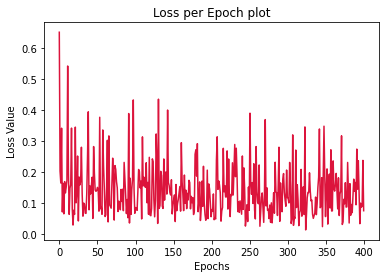

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(0, 400)), epl_loss, color = 'crimson')
  
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Loss per Epoch plot')
plt.show()

In [9]:
from nltk.tokenize import sent_tokenize

sen_des = []
sen_abs = []
for i in range(len(df)):
  ns1 = sent_tokenize(df['description'][i])
  ns2 = sent_tokenize(df['abstract'][i])
  sen_des.append(len(ns1))
  sen_abs.append(len(ns2))


In [10]:
import numpy as np
df['Description Length'] = np.array(sen_des)
df['Abstract Length'] = np.array(sen_abs)

Text(0, 0.5, 'Summary Length')

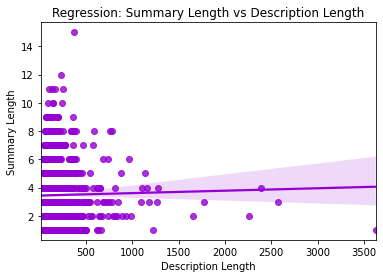

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.regplot(x='Description Length', y='Abstract Length', data = df, color = "darkviolet");
plt.title('Regression: Summary Length vs Description Length')
plt.xlabel('Description Length')
plt.ylabel('Summary Length')


In [13]:
r_squared_matrix = np.corrcoef(sen_des, sen_abs)**2

print('r_squared = ', r_squared_matrix[0][1],3)

r_squared =  0.00028217396772802834 3
